<a href="https://colab.research.google.com/github/Gabryel-Borges/lia1-2023-2/blob/main/Gabryel-Entregas/Jogar_t%C3%AAnis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Pré-Processamento

In [24]:
import pandas as pd
base_jogar_tenis = pd.read_csv("/content/Jogar_tenis.csv")

In [25]:
base_jogar_tenis

,Tempo,Temperatura,Humidade,Vento,Jogar tênis
0,Ensolarado,Quente,Alta,Fraco,Não
1,Ensolarado,Quente,Alta,Forte,Não
2,Nublado,Quente,Alta,Fraco,Sim
3,Chuvoso,Moderada,Alta,Fraco,Sim
4,Chuvoso,Agradavel,Normal,Fraco,Sim
5,Chuvoso,Agradavel,Normal,Forte,Não
6,Nublado,Agradavel,Normal,Forte,Sim
7,Ensolarado,Moderada,Alta,Fraco,Não
8,Ensolarado,Agradavel,Normal,Fraco,Sim
9,Chuvoso,Moderada,Normal,Fraco,Sim


In [26]:
X_jogar_tenis = base_jogar_tenis.iloc[:, 0:4].values
X_jogar_tenis

array([['Ensolarado', 'Quente', 'Alta', 'Fraco'],
       ['Ensolarado', 'Quente', 'Alta', 'Forte'],
       ['Nublado', 'Quente', 'Alta', 'Fraco'],
       ['Chuvoso', 'Moderada', 'Alta', 'Fraco'],
       ['Chuvoso', 'Agradavel', 'Normal', 'Fraco'],
       ['Chuvoso', 'Agradavel', 'Normal', 'Forte'],
       ['Nublado', 'Agradavel', 'Normal', 'Forte'],
       ['Ensolarado', 'Moderada', 'Alta', 'Fraco'],
       ['Ensolarado', 'Agradavel', 'Normal', 'Fraco'],
       ['Chuvoso', 'Moderada', 'Normal', 'Fraco'],
       ['Ensolarado', 'Moderada', 'Normal', 'Forte'],
       ['Nublado', 'Moderada', 'Alta', 'Fraco'],
       ['Nublado', 'Quente', 'Normal', 'Fraco'],
       ['Chuvoso', 'Moderada', 'Alta', 'Forte']], dtype=object)

In [27]:
y_jogar_tenis = base_jogar_tenis.iloc[:, 4].values
y_jogar_tenis

array(['Não', 'Não', 'Sim', 'Sim', 'Sim', 'Não', 'Sim', 'Não', 'Sim',
       'Sim', 'Sim', 'Sim', 'Sim', 'Não'], dtype=object)

In [28]:
## converte atributos categóricos em valores numéricos
from sklearn.preprocessing import LabelEncoder

label_encoder_tempo = LabelEncoder()
label_encoder_temperatura = LabelEncoder()
label_encoder_humidade = LabelEncoder()
label_encoder_vento = LabelEncoder()

In [29]:
X_jogar_tenis[:,0] = label_encoder_tempo.fit_transform(X_jogar_tenis[:,0])
X_jogar_tenis[:,1] = label_encoder_temperatura.fit_transform(X_jogar_tenis[:,1])
X_jogar_tenis[:,2] = label_encoder_humidade.fit_transform(X_jogar_tenis[:,2])
X_jogar_tenis[:,3] = label_encoder_vento.fit_transform(X_jogar_tenis[:,3])

In [30]:
X_jogar_tenis

array([[1, 2, 0, 1],
       [1, 2, 0, 0],
       [2, 2, 0, 1],
       [0, 1, 0, 1],
       [0, 0, 1, 1],
       [0, 0, 1, 0],
       [2, 0, 1, 0],
       [1, 1, 0, 1],
       [1, 0, 1, 1],
       [0, 1, 1, 1],
       [1, 1, 1, 0],
       [2, 1, 0, 1],
       [2, 2, 1, 1],
       [0, 1, 0, 0]], dtype=object)

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
arvore_jogar_tenis = DecisionTreeClassifier(criterion='entropy')

arvore_jogar_tenis.fit(X_jogar_tenis, y_jogar_tenis)

DecisionTreeClassifier(criterion='entropy')

In [33]:
## qual é o atributo mais importante
arvore_jogar_tenis.feature_importances_

array([0.36262858, 0.15192947, 0.21123658, 0.27420537])

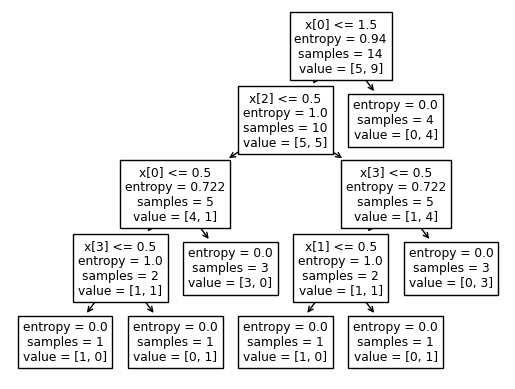

In [34]:
# visualizar a árvore de decisão
from sklearn import tree
tree.plot_tree(arvore_jogar_tenis);

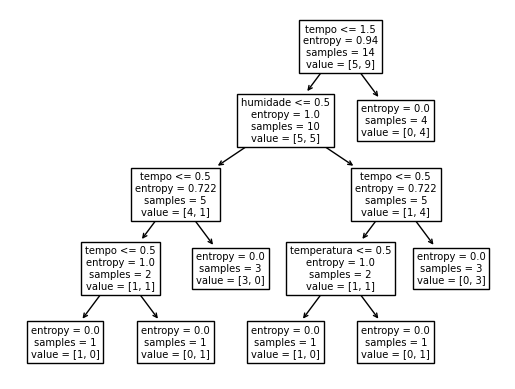

In [35]:
previsores = ['tempo', 'temperatura', 'humidade', 'tempo']
tree.plot_tree(arvore_jogar_tenis, feature_names=previsores);

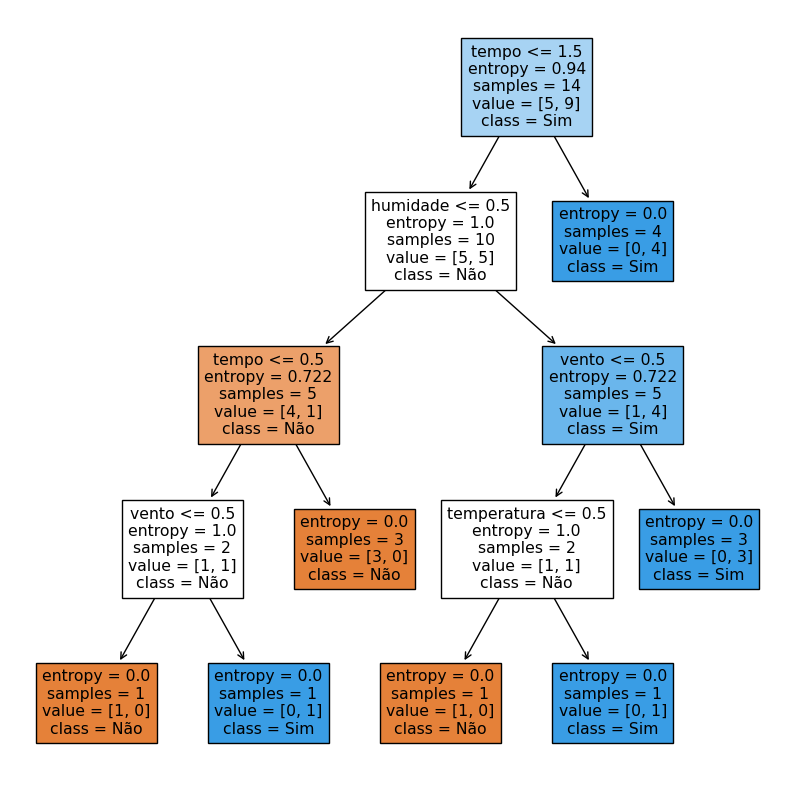

In [36]:
import matplotlib.pyplot as plt
previsores = ['tempo', 'temperatura', 'humidade', 'vento']
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
tree.plot_tree(arvore_jogar_tenis, feature_names=previsores, class_names=arvore_jogar_tenis.classes_, filled=True);

In [38]:
# Ensolarado, Moderada, Normal, Forte
teste1 = arvore_jogar_tenis.predict([[1,1,1,0]])
teste1

array(['Sim'], dtype=object)

In [39]:
# Chuvoso, Agradável, Normal, Fraco
teste2 = arvore_jogar_tenis.predict([[0,0,1,1]])
teste2

array(['Sim'], dtype=object)

In [40]:
# Nublado, Quente, Normal, Forte
teste3 = arvore_jogar_tenis.predict([[2,2,1,0]])
teste3

array(['Sim'], dtype=object)

In [41]:
# Nublado, Agradável, Alta, Forte
teste4 = arvore_jogar_tenis.predict([[2,0,0,0]])
teste4

array(['Sim'], dtype=object)